In [ ]:
#!pip install yahoo-finance 
#!pip install pandas-datareader
#!pip install tensorflow

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0) 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,26720.0,26260.0,26720.0,26660.0,10139500.0,22273.216797
2015-01-06,26340.0,25760.0,26300.0,25900.0,15235500.0,21638.275391
2015-01-07,26220.0,25640.0,25880.0,26140.0,14322750.0,21838.787109
2015-01-08,26780.0,26200.0,26780.0,26280.0,14477600.0,21955.746094
2015-01-09,26440.0,26280.0,26280.0,26280.0,9312400.0,21955.746094


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-08,65700.0,65300.0,65400.0,65300.0,12483180.0,65300.0
2022-06-09,65200.0,64500.0,65100.0,65200.0,25790725.0,65200.0
2022-06-10,64400.0,63800.0,64000.0,63800.0,22193552.0,63800.0
2022-06-13,62800.0,62100.0,62400.0,62100.0,22157816.0,62100.0
2022-06-14,62200.0,61100.0,61200.0,61900.0,24606419.0,61900.0


주가 저장 완료


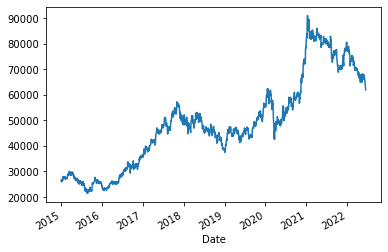

In [3]:
start_date = '2015-01-04'
end_date = '2022-06-14'

# get stock data from yahoo finance
stock = data.DataReader('005930.KS', 'yahoo', start_date, end_date)

display(stock.head())
display(stock.tail())

stock['Close'].plot() # stock graph
stock.to_csv('stock_data.csv')
print('save')

In [4]:
type(stock)   # pandas.core.frame.DataFrame
len(stock)    # 107

1828

In [5]:
stock['Close'] # series

Date
2015-01-05    26660.0
2015-01-06    25900.0
2015-01-07    26140.0
2015-01-08    26280.0
2015-01-09    26280.0
               ...   
2022-06-08    65300.0
2022-06-09    65200.0
2022-06-10    63800.0
2022-06-13    62100.0
2022-06-14    61900.0
Name: Close, Length: 1828, dtype: float64

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1)) # transform data -> 0~1
close_data_all = stock['Close']
close_data_scaled = sc.fit_transform(np.array(close_data_all).reshape(-1,1))
close_data_scaled

array([[0.07637094],
       [0.06546081],
       [0.06890612],
       ...,
       [0.60953201],
       [0.58512776],
       [0.58225668]])

In [7]:
train = close_data_scaled[:len(close_data_scaled)-20] # train_data
test = close_data_scaled[len(close_data_scaled)-20:] # validation_data

len(train)  
len(test)

20

In [8]:
x_train = []
y_train = []

for i in range(len(train)-20):
    x_train.append( train[i:i+20] )
    y_train.append( train[i+20] )

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
x_train.shape
y_train.shape

(1788, 1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=30, return_sequences=True, input_shape=(20, 1))) # train 20 data at once
model.add(Dropout(0.2))

model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=30))  # no sequence return
model.add(Dropout(0.2))


model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 30)            3840      
                                                                 
 dropout (Dropout)           (None, 20, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 20, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 30)            7320      
                                                                 
 dropout_2 (Dropout)         (None, 20, 30)            0         
                                                                 
 lstm_3 (LSTM)               (None, 30)                7

In [12]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
28/28 [==============================] - 5s 21ms/step - loss: 0.0394
Epoch 2/100
28/28 [==============================] - 1s 20ms/step - loss: 0.0079
Epoch 3/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0053
Epoch 4/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0048
Epoch 5/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0049
Epoch 6/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0045
Epoch 7/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 8/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0042
Epoch 9/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0040
Epoch 10/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 11/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0038
Epoch 12/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 13/100
28/28 [=====

28/28 [==============================] - 1s 21ms/step - loss: 0.0014


In [13]:
history.history.keys()

dict_keys(['loss'])

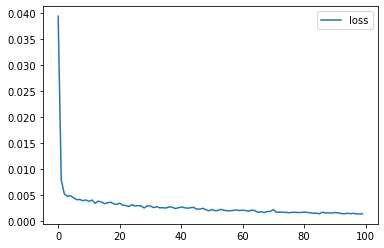

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
plt.plot(loss, label='loss')
plt.legend()
plt.show()

In [15]:
_x = x_train[-1]
_x.shape

(20, 1)

In [16]:
_x = x_train[-1]
_y = []
_x = _x.reshape(-1,20,1)

pred_y = model.predict(_x)

for i in range(40):
    pred_y = model.predict(_x)
    _y.append(pred_y[0,0])
    tmp = np.append(_x.reshape(20,), pred_y[0,0]) 
    tmp = np.delete(tmp,0)
    # tmp.shape   # (20,)
    _x = tmp.reshape(-1,20,1)

In [17]:
test.shape

(20, 1)

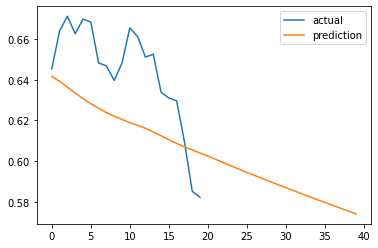

In [18]:
import matplotlib.pyplot as plt
plt.plot(test.reshape(20,), label='actual')
plt.plot(_y, label='prediction')
plt.legend()
plt.show()

In [19]:
actual = sc.inverse_transform(test.reshape(-1,1))
pred = sc.inverse_transform(np.array(_y).reshape(-1,1))

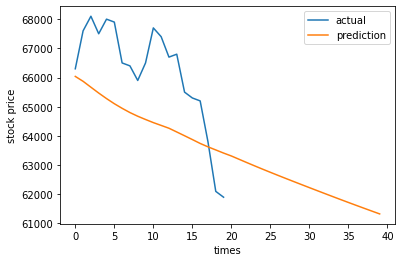

In [20]:
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.xlabel('times')
plt.ylabel('stock price')
plt.legend()
plt.show()